### PUNTO 1 :ANÁLISIS

Importamos las librerias necesarias, en este caso trabajaremos con ``Dask`` pues nos permite trabajar con grandes volumenes de datos y además facilita el escalado de librerias como Pandas, Numpy y Scikit-learn.

In [180]:
#Importamos la librería
import dask.dataframe as dd

In [181]:
#Cargamos el dataset
df= dd.read_csv('../data/air_traffic_data.csv')

In [182]:
#Consultamos los registros del dataset
df.compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [183]:
#Miramos los tipos de datos de las columnas
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

In [184]:
#Vemos si hay valores nulos en el dataset
df.isnull().sum().compute()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [185]:
#Eliminamos los valores nulos
df = df.dropna()
#Comprobamos que se han eliminado los valores nulos
df.isnull().sum().compute()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

In [186]:
#Echamos un vistazo a los datos
df.describe().compute()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,14953.000000,14953.000000,14953.000000,14953.000000
mean,201044.583963,29345.619006,29437.338862,2010.380325
std,313.675658,58398.448380,58362.879319,3.140994
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5409.000000,5523.000000,2008.000000
50%,201011.000000,9260.000000,9418.000000,2010.000000
75%,201308.000000,21222.000000,21267.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


En la lista ``columnas_innecesarias`` definimos las columnas a eliminar del dataset por ser meramente informativas.

In [187]:
#Definimos las columnas innecesarias a eliminar
columnas_innecesarias= ['Operating Airline IATA Code', 'Published Airline IATA Code', 'GEO Summary', 'Adjusted Activity Type Code','Adjusted Passenger Count',
                         'Published Airline','Boarding Area','Activity Type Code']
# Eliminar las columnas innecesarias
df_1 = df.drop(columns=columnas_innecesarias)
#Guardamos el dataset en un csv
df_1.compute()

,Activity Period,Operating Airline,GEO Region,Price Category Code,Terminal,Passenger Count,Year,Month
0,200507,ATA Airlines,US,Low Fare,Terminal 1,27271,2005,July
1,200507,ATA Airlines,US,Low Fare,Terminal 1,29131,2005,July
2,200507,ATA Airlines,US,Low Fare,Terminal 1,5415,2005,July
3,200507,Air Canada,Canada,Other,Terminal 1,35156,2005,July
4,200507,Air Canada,Canada,Other,Terminal 1,34090,2005,July
...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,US,Low Fare,Terminal 2,194636,2016,March
15003,201603,Virgin America,Mexico,Low Fare,International,4189,2016,March
15004,201603,Virgin America,Mexico,Low Fare,Terminal 2,4693,2016,March
15005,201603,Virgin Atlantic,Europe,Other,International,12313,2016,March


In [188]:
df_1.to_csv('../data/air_traffic_data_clean.csv', index=False)

['/Users/hectorbernaltrujillo/Documents/informática/Programación python/ff/Ejemplo-Paso-a-Paso/BD_proyecto_final/notebook/../data/air_traffic_data_clean.csv/0.part']

In [189]:
#Tipología de las variables existemtes en nuestro dataset
df_1.dtypes.value_counts()

object    5
int64     3
dtype: int64

### PUNTO 2: RESOLVEMOS LAS PREGUNTAS

In [190]:
#Vemos cuantas compañías diferentes hay en el dataset
compania_unicas= df_1['Operating Airline'].unique().compute()
print('El número de compañías diferentes es: ', len(compania_unicas))

El número de compañías diferentes es:  73


In [191]:
#Para ver cuales son usamos el siguiente código
for i in range (len(compania_unicas)):
    print(compania_unicas[i])

ATA Airlines
Air Canada 
Air China
Air France
Air New Zealand
AirTran Airways
Alaska Airlines
All Nippon Airways
American Airlines
American Eagle Airlines
Asiana Airlines
Atlantic Southeast Airlines
BelAir Airlines
British Airways
Cathay Pacific
China Airlines
Delta Air Lines
EVA Airways
Frontier Airlines
Hawaiian Airlines
Horizon Air 
Icelandair
Independence Air
Japan Airlines
KLM Royal Dutch Airlines
Korean Air Lines
Lufthansa German Airlines
Mesa Airlines
Mexicana Airlines
Midwest Airlines
Northwest Airlines
Philippine Airlines
Singapore Airlines
SkyWest Airlines
Sun Country Airlines
TACA
US Airways
United Airlines
United Airlines - Pre 07/01/2013
Virgin Atlantic
WestJet Airlines
Miami Air International
Air Canada Jazz
Qantas Airways
Ameriflight
Spirit Airlines
Xtra Airways
Evergreen International Airlines
Aeromexico
JetBlue Airways 
ExpressJet Airlines
Southwest Airlines
Virgin America
Aer Lingus
Allegiant Air
Jet Airways
Emirates 
Mesaba Airlines
World Airways
Air Berlin
Republic 

In [192]:
#Observamos cúantos pasajeros tienen de media los vuelos de cada compañía
media_pasajeros= df_1.groupby('Operating Airline')['Passenger Count'].mean().compute()
print('La media de pasajeros por compañía es: ', media_pasajeros)

La media de pasajeros por compañía es:  Operating Airline
ATA Airlines          8744.636364
Aer Lingus            4407.183673
Aeromexico            5463.822222
Air Berlin            2320.750000
Air Canada           18251.560109
                         ...     
Virgin Atlantic       9847.104651
WestJet Airlines      5338.155340
World Airways          261.666667
XL Airways France     2223.161290
Xtra Airways            73.000000
Name: Passenger Count, Length: 73, dtype: float64


In [193]:
#Eliminamos los registros duplicados por el campo 'GEO Region' y mantenemos aquellos con mayor número de pasajeros
df_sin_duplicados = df_1.groupby('GEO Region').apply(lambda x: x.loc[x['Passenger Count'].idxmax()])

# Mostrar el nuevo DataFrame resultante
df_sin_duplicados.compute()

/var/folders/06/2bgv2jcx533g70nn8y0_0z4r0000gn/T/ipykernel_41296/3940489678.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  df_sin_duplicados = df_1.groupby('GEO Region').apply(lambda x: x.loc[x['Passenger Count'].idxmax()])


,Activity Period,Operating Airline,GEO Region,Price Category Code,Terminal,Passenger Count,Year,Month
GEO Region,,,,,,,,
Asia,200708,United Airlines - Pre 07/01/2013,Asia,Other,International,86398,2007,August
Australia / Oceania,201501,Air New Zealand,Australia / Oceania,Other,International,12973,2015,January
Canada,200708,Air Canada,Canada,Other,Terminal 3,39798,2007,August
Central America,201410,TACA,Central America,Other,International,8970,2014,October
Europe,201507,United Airlines,Europe,Other,International,48136,2015,July
Mexico,201407,United Airlines,Mexico,Other,International,29206,2014,July
Middle East,201507,Emirates,Middle East,Other,International,14769,2015,July
South America,201101,LAN Peru,South America,Other,International,3685,2011,January
US,201308,United Airlines,US,Other,Terminal 3,659837,2013,August


In [194]:
#Volcaremos los datos anteriores a un CSV es decir sin duplicados y una columna donde pondremos la media de pasajeros por compañía
resultados_combinados=dd.merge(df_sin_duplicados, media_pasajeros, on='Operating Airline')
#Lo guardamos en un CSV
resultados_combinados.to_csv('../data/resultados_combinados.csv', single_file = True)

['/Users/hectorbernaltrujillo/Documents/informática/Programación python/ff/Ejemplo-Paso-a-Paso/BD_proyecto_final/notebook/../data/resultados_combinados.csv']

### PUNTO 3

Ahora haremos un análisis descriptivo de los datos, y seguiremos usando ``DASK`` 

In [195]:
# Calcular la media de cada elemento del conjunto de datos
media = df.mean().compute()
# Calcular la desviación estándar de cada elemento del conjunto de datos
desviacion_estandar = df.std().compute()

# Mostrar los resultados
print("Media de cada elemento:")
print(media)
print("\nDesviación estándar de cada elemento:")
print(desviacion_estandar)

Media de cada elemento:
Activity Period             201044.583963
Passenger Count              29345.619006
Adjusted Passenger Count     29437.338862
Year                          2010.380325
dtype: float64

Desviación estándar de cada elemento:
Activity Period               313.675658
Passenger Count             58398.448380
Adjusted Passenger Count    58362.879319
Year                            3.140994
dtype: float64


/Users/hectorbernaltrujillo/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/core.py:1929: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meta = self._meta_nonempty.mean(axis=axis, skipna=skipna)
/Users/hectorbernaltrujillo/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/core.py:2118: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meta = self._meta_nonempty.std(axis=axis, skipna=skipna)
/Users/hectorbernaltrujillo/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/core.py:1973: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.

#### CONCLUSIONES

Como podemos observar los datos anteriores nos brindan infromación sobre la distribución y variabilidad de los datos. Por ejemplo, podemos ver que tras calcular las media de la columna ``Year``podemos ver una cierta concentración alrededor del año 2010. Por otro lado, el cálculo de la desviación estándar de la columna ``Passenger_Count`` nos indica que la cantidad de pasajeros por vuelo puede tener una amplia variabilidad, es decir que puede ocurrir que haya vuelos con pocos pasajeros y vuelos con muchos pasajeros.

In [196]:
#Vamos a calcular también la cantidad de datos del mismo tipo en la columna 'GEO Region'
df_1['GEO Region'].value_counts().compute()

US                     5757
Asia                   3272
Europe                 2078
Canada                 1418
Mexico                 1115
Australia / Oceania     737
Central America         272
Middle East             214
South America            90
Name: GEO Region, dtype: int64

#### Conclusión
Vemos que hay una mayor cantidad de vuelos en US, Asia y Europa


#### MATRIZ DE CORRELACIÓN


In [197]:
#Ahora nos piden contruir una matriz de correlación, por lo que necesitamos que los datos sean númericos. Es por ello por lo que vamos a convertirlos.
# Convertir las columnas a categórico
df_encoded=df_1.categorize() #Con esto convertimos las columnas a categóricas, es decir, a numéricas.

#Asignamos los códigos numericos a las columnas
column_names= df_encoded.columns

for column_name in column_names:
    if df_encoded[column_name].dtype == 'int64':
        pass
    else:
        df_encoded[column_name]=df_encoded[column_name].cat.codes

#Mostramos el resultado
df_encoded = df_encoded.compute()
df_encoded



,Activity Period,Operating Airline,GEO Region,Price Category Code,Terminal,Passenger Count,Year,Month
0,200507,0,0,0,0,27271,2005,0
1,200507,0,0,0,0,29131,2005,0
2,200507,0,0,0,0,5415,2005,0
3,200507,1,1,1,0,35156,2005,0
4,200507,1,1,1,0,34090,2005,0
...,...,...,...,...,...,...,...,...
15002,201603,52,0,0,4,194636,2016,9
15003,201603,52,5,0,1,4189,2016,9
15004,201603,52,5,0,4,4693,2016,9
15005,201603,39,3,1,1,12313,2016,9


In [198]:
#Cogemos las columnas numéricas para calcular la matriz de correlación
columnas_numericas= df_encoded.select_dtypes(include=['int64','float64', 'int8']).columns
matriz_correlacion= df_encoded[columnas_numericas].corr(method='pearson')
matriz_correlacion

,Activity Period,Operating Airline,GEO Region,Price Category Code,Terminal,Passenger Count,Year,Month
Activity Period,1.000000,0.160053,0.076196,-0.003884,0.104163,0.061160,0.999940,0.098062
Operating Airline,0.160053,1.000000,0.130238,-0.166091,0.113821,0.093672,0.159843,0.004855
GEO Region,0.076196,0.130238,1.000000,0.281300,0.064296,-0.317739,0.076181,0.007794
Price Category Code,-0.003884,-0.166091,0.281300,1.000000,0.097450,-0.068560,-0.003816,0.004210
Terminal,0.104163,0.113821,0.064296,0.097450,1.000000,0.260837,0.104015,0.000762
Passenger Count,0.061160,0.093672,-0.317739,-0.068560,0.260837,1.000000,0.060917,-0.012845
Year,0.999940,0.159843,0.076181,-0.003816,0.104015,0.060917,1.000000,0.103449
Month,0.098062,0.004855,0.007794,0.004210,0.000762,-0.012845,0.103449,1.000000


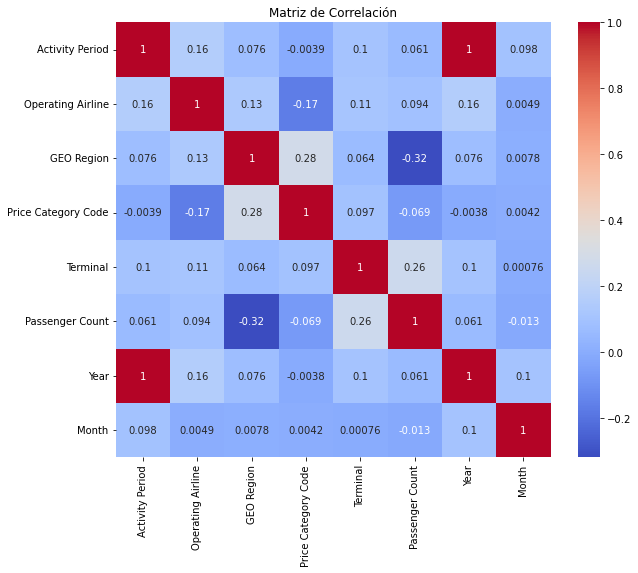

<Figure size 432x288 with 0 Axes>

In [199]:
#Lo visualizamos haciendo uso de la librería seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Tomamos las columnas numéricas
columnas_numericas = df_encoded.select_dtypes(include=['float64', 'int64' , 'int8']).columns

# Calcular la matriz de correlación
correlation_matrix = df_encoded[columnas_numericas].corr()
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()
plt.savefig('../images/matriz_correlacion.png')



#### CONCLUSIONES:

La matriz de correlación proporciona información sobre las relaciones lineales entre las variables en el dataset de vuelos. Aquí hay algunas conclusiones que se pueden extraer de la matriz:

-``Activity Period``: La variable de 'Activity Period' tiene una correlación positiva moderada con las variables de perating Airline, GEO Region, Terminal, Passenger Count, y Year. Esto sugiere que estos factores tienden a variar en conjunto con el periodo de actividadde los vuelos.

-``Operating Airline``: La variable de aerolínea operativa tiene una correlación débil positiva con la Activity period y una correlación débil negativa con Price Category. Esto indica que ciertas aerolíneas pueden tener una mayor presencia en ciertos períodos de actividad y pueden tener diferentes niveles de precios.

-``GEO Region``: La variable 'GEO Region' tiene una correlación débil positiva con Price Category y una correlación débil negativa con Passenger Counts. Esto sugiere que las regiones geográficas pueden influir ligeramente en los precios y en la demanda de pasajeros.

-``Price Category``: La variable de categoría de precio tiene una correlación débil positiva con GEO Region y una correlación débil negativa con  Operating Airline. Esto indica que las categorías de precios pueden estar relacionadas con la ubicación geográfica y las aerolíneas específicas.

-``Terminal``: La variable de terminal tiene una correlación débil positiva con la actividad period y una correlación débil positiva con  Operating Airline. Esto sugiere que los terminales pueden estar asociados con ciertos períodos de actividad y pueden acomodar diferentes volúmenes de pasajeros.

-``Passenger Count``: La variable de recuento de pasajeros tiene una correlación débil positiva con el Terminal y una correlación débil negativa con la GEO Region. Esto indica que el recuento de pasajeros puede estar influenciado por el terminal utilizado y la ubicación geográfica del vuelo.

En resumen, la matriz de correlación proporciona información sobre las relaciones entre las variables del dataset de vuelos. Sin embargo, es importante tener en cuenta que la correlación no implica causalidad, y es necesario realizar un análisis más detallado, que lo haremos a continuación. 

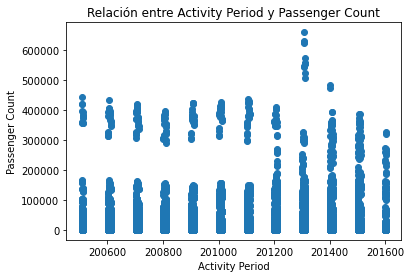

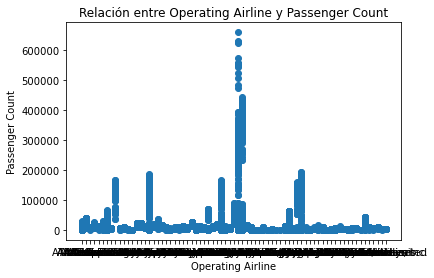

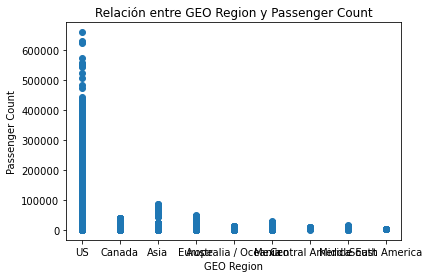

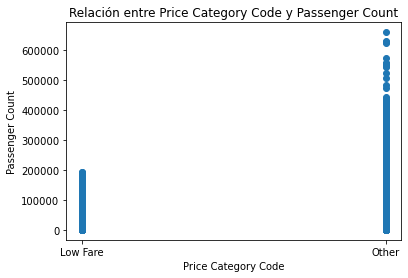

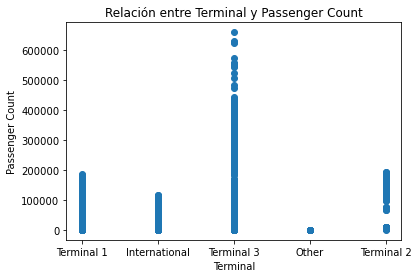

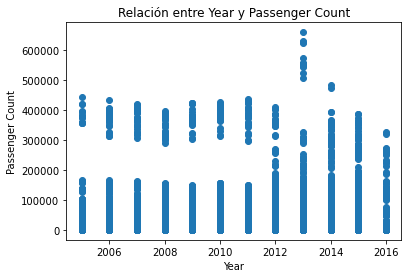

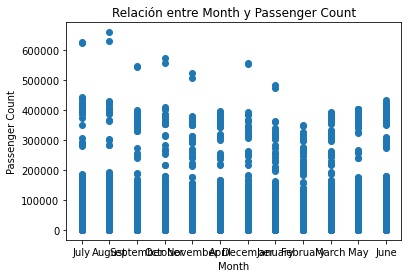

<Figure size 432x288 with 0 Axes>

In [200]:
#Ahora vamos hacer un análisis para saber como las columnas estan relacionadas con la columna 'Passenger Count' (PUES ES LA QUE LUEGO QUIERO PREDECIR)
columna_referencia= 'Passenger Count'
# Obtener los datos de la columna de referencia
data_referencia = df_1[columna_referencia].compute()

# Obtener las columnas restantes para el análisis
columnas_analisis = df_1.columns[df_1.columns != columna_referencia]

# Crear un gráfico de dispersión para cada columna
for columna in columnas_analisis:
    # Obtener los datos de la columna actual
    data_actual = df_1[columna].compute()
    
    # Crear el gráfico de dispersión
    plt.scatter(data_actual, data_referencia)
    plt.xlabel(columna)
    plt.ylabel(columna_referencia)
    plt.title('Relación entre ' + columna + ' y ' + columna_referencia)
    plt.show()
    plt.savefig('../images/relacion_' + columna + '.png')

#### Conclusión
Tras analizar las gráficas anteriores vemos que no hay una relación lineal entre las variables y la variables objetivo, lo que quiere decir que no podemos usar un modelo de regresión lineal. Es por ello que usaremos un modelo de regresión logística como el modelo ``Decision Tree Regressor`` o el modelo de clasificación como ``Random Forest Regressor``.

### DECISION TREE REGRESSOR (modelo de regresión logística)